In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from csv import reader
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sn

In [28]:
stars = pd.read_csv('C:/Users/Hazem Elseify/Downloads/6 class csv.csv')
X = stars[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
y = stars[['Star type']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
r = model.fit(X_train, y_train,epochs=200,batch_size=10)

Epoch 1/200
16/16 [==============================] - 0s 777us/step - loss: 1.8823 - accuracy: 0.2250
Epoch 2/200
16/16 [==============================] - 0s 637us/step - loss: 1.8572 - accuracy: 0.2062
Epoch 3/200
16/16 [==============================] - 0s 665us/step - loss: 1.8348 - accuracy: 0.2125
Epoch 4/200
16/16 [==============================] - 0s 625us/step - loss: 1.8158 - accuracy: 0.2188
Epoch 5/200
16/16 [==============================] - 0s 623us/step - loss: 1.8002 - accuracy: 0.2250
Epoch 6/200
16/16 [==============================] - 0s 686us/step - loss: 1.7856 - accuracy: 0.2375
Epoch 7/200
16/16 [==============================] - 0s 688us/step - loss: 1.7731 - accuracy: 0.2438
Epoch 8/200
16/16 [==============================] - 0s 623us/step - loss: 1.7607 - accuracy: 0.2562
Epoch 9/200
16/16 [==============================] - 0s 749us/step - loss: 1.7489 - accuracy: 0.2625
Epoch 10/200
16/16 [==============================] - 0s 748us/step - loss: 1.7368 - accura

In [33]:
print(model.evaluate(X_test, y_test))

3/3 [==============================] - 0s 1000us/step - loss: 0.1009 - accuracy: 0.9875
[0.10087473690509796, 0.987500011920929]


In [23]:
y_predict=model.predict(X_test)
Y_predict=[]
for i in y_predict:
    mx=np.max(i)
    idx=-1
    for j in i:
        idx=idx+1
        if(mx==j):
            break
    Y_predict.append(idx)

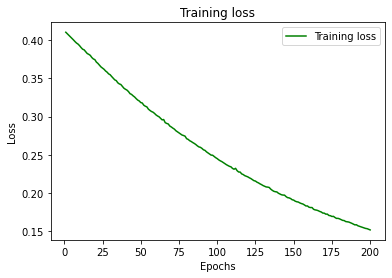

In [24]:
loss_train = r.history['loss']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

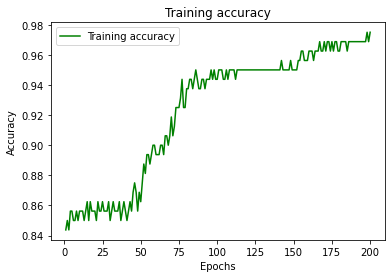

In [25]:
accuray_train = r.history['accuracy']
epochs = range(1,201)
plt.plot(epochs, accuray_train, 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

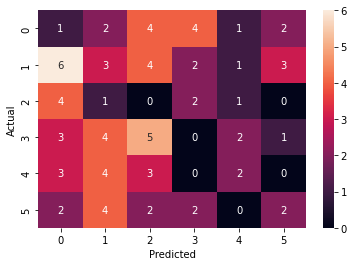

In [34]:
#print(type(y_test.tolist()))
#print(y_test)
y_test=y_test.to_numpy()
y_test=y_test.tolist()
y_testnew=[]
for i in y_test:
    for j in i:
        y_testnew.append(j)

y_actu = pd.Series(y_testnew, name='Actual')
y_pred = pd.Series(Y_predict,name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
sn.heatmap(df_confusion, annot=True)
plt.show()
#pint(df_confusion)

In [13]:
"""
from yellowbrick.classifier import ROCAUC
def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):
    visualizer = ROCAUC(model, encoder={0: 'functional', 
                                        1: 'needs repair', 
                                        2: 'nonfunctional'})                              
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    return visualizer
"""

"\nfrom yellowbrick.classifier import ROCAUC\ndef plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):\n    visualizer = ROCAUC(model, encoder={0: 'functional', \n                                        1: 'needs repair', \n                                        2: 'nonfunctional'})                              \n    visualizer.fit(xtrain, ytrain)\n    visualizer.score(xtest, ytest)\n    visualizer.show()\n    return visualizer\n"